<h1 align = "center">Advance House Price Prediction </h1>

#### In this project, we are predicting sales price of houses by using different algorithm and methods applied on the various feature given of the houses. 

### Lifecycle of the Project
1. Data Analysis
2. Feature Engineering 
3. Feature Selection
4. Model Building
5. Model Testing

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

## Importing Dataset

In [2]:
df = pd.read_csv("data/house_prices.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

In [4]:
# We don't need id feature
df.drop("Id", axis = 1, inplace = True)

<h2 align = center> Data analysis </h2>

### In Data analysis
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Outlies
5. Categorical Variables
6. Cardinality of Categorical Variables
7. Relationship between independent and dependent feature(SalePrice)

### Missing Values

In [5]:
feature_with_na = [feature for feature in df.columns if df[feature].isnull().sum() > 1]

## feature with their percentage wise missing value
for feature in feature_with_na:
    print(f"{feature} has {np.round(df[feature].isnull().mean(), 4)}% missing values.")
    
print("Total Missing values features", len(feature_with_na))

LotFrontage has 0.1774% missing values.
Alley has 0.9377% missing values.
MasVnrType has 0.0055% missing values.
MasVnrArea has 0.0055% missing values.
BsmtQual has 0.0253% missing values.
BsmtCond has 0.0253% missing values.
BsmtExposure has 0.026% missing values.
BsmtFinType1 has 0.0253% missing values.
BsmtFinType2 has 0.026% missing values.
FireplaceQu has 0.4726% missing values.
GarageType has 0.0555% missing values.
GarageYrBlt has 0.0555% missing values.
GarageFinish has 0.0555% missing values.
GarageQual has 0.0555% missing values.
GarageCond has 0.0555% missing values.
PoolQC has 0.9952% missing values.
Fence has 0.8075% missing values.
MiscFeature has 0.963% missing values.
Total Missing values features 18


#### Since their are many missing values, we need to check their relationship with the sales price.

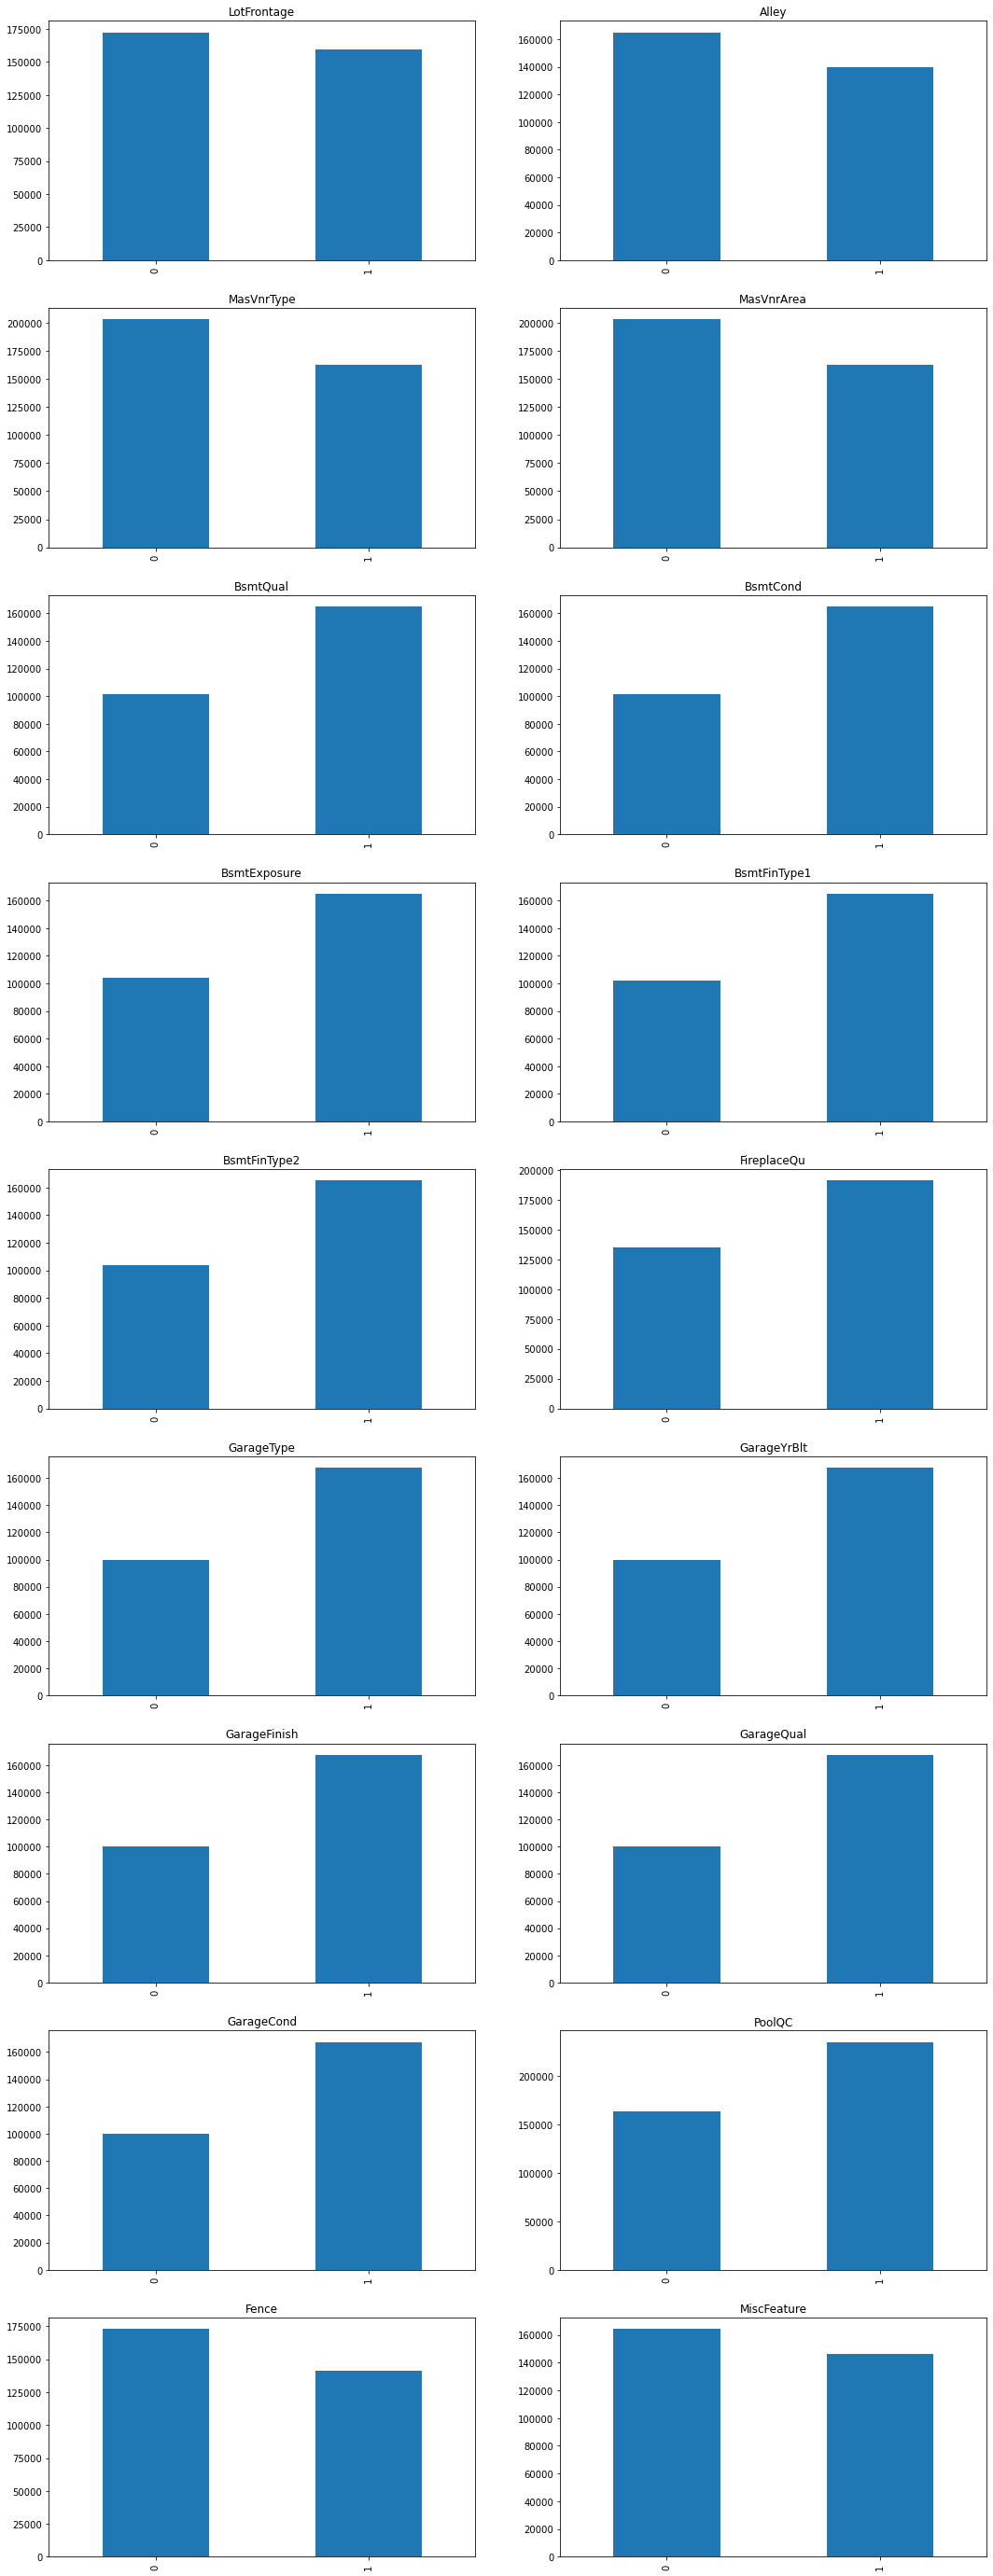

In [6]:
# ploting graphs with sales prices
plt.figure(figsize = (18,50))

for feature in feature_with_na:
    data = df.copy()
    
    # putting 0 as missing value and 1 as non-missing value
    data[feature] = np.where(data[feature].isnull(), 0, 1)
    
    index = feature_with_na.index(feature) +1
    
    # making graph as subplots
    plt.subplot(9,2,index)
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.title(feature)
    plt.xlabel("")
    

#### With the relationships, we can't drop the missing values as the sales price is dependent on them . Wo we need to replace them with something meaningful.

### Temporal features (datetime, years)
As the data was updating the time and years values are changes.

In [7]:
year_features = [feature for feature in df.columns if "Year" in feature or "Yr" in feature]
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

<AxesSubplot:xlabel='YrSold'>

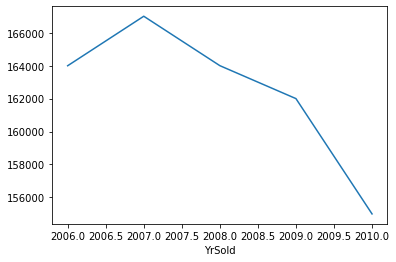

In [8]:
df.groupby("YrSold")["SalePrice"].median().plot()

#### As year increases the prices of houses get decreases.

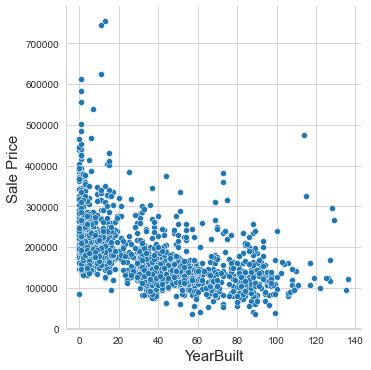

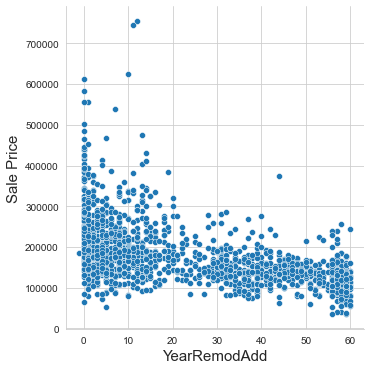

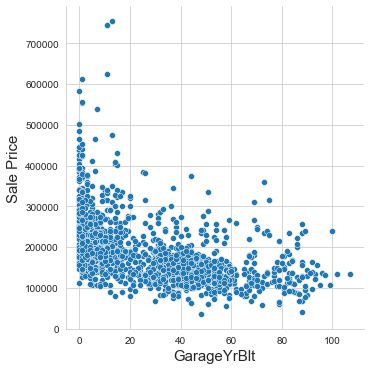

In [9]:
# relation between how old the data with the year sold and sales price
sns.set_style("whitegrid")
for feature in year_features[:-1]:
    x = df["YrSold"] - df[feature]
    sns.relplot(x , df["SalePrice"])
    plt.xlabel(feature, fontsize = 15)
    plt.ylabel("Sale Price", fontsize = 15)
    plt.show()

#### If house are old their price are less and if it is new it price are getting high.

### Numerical Features

In [10]:
# getting numerical features
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]
print(f"Total number of Numerical features = {len(numerical_features)}")
df[numerical_features].head()

Total number of Numerical features = 37


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


### Numerical Feature are of two types -
1. Discrete Variable Feature
2. Continous Variable Feature

### 1.  Discrete Features

In [11]:
# discrete variable feature
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) < 25 and feature not in year_features ]
print("Total discrete features is", len(discrete_features) )

df[discrete_features].head()

Total discrete features is 17


,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


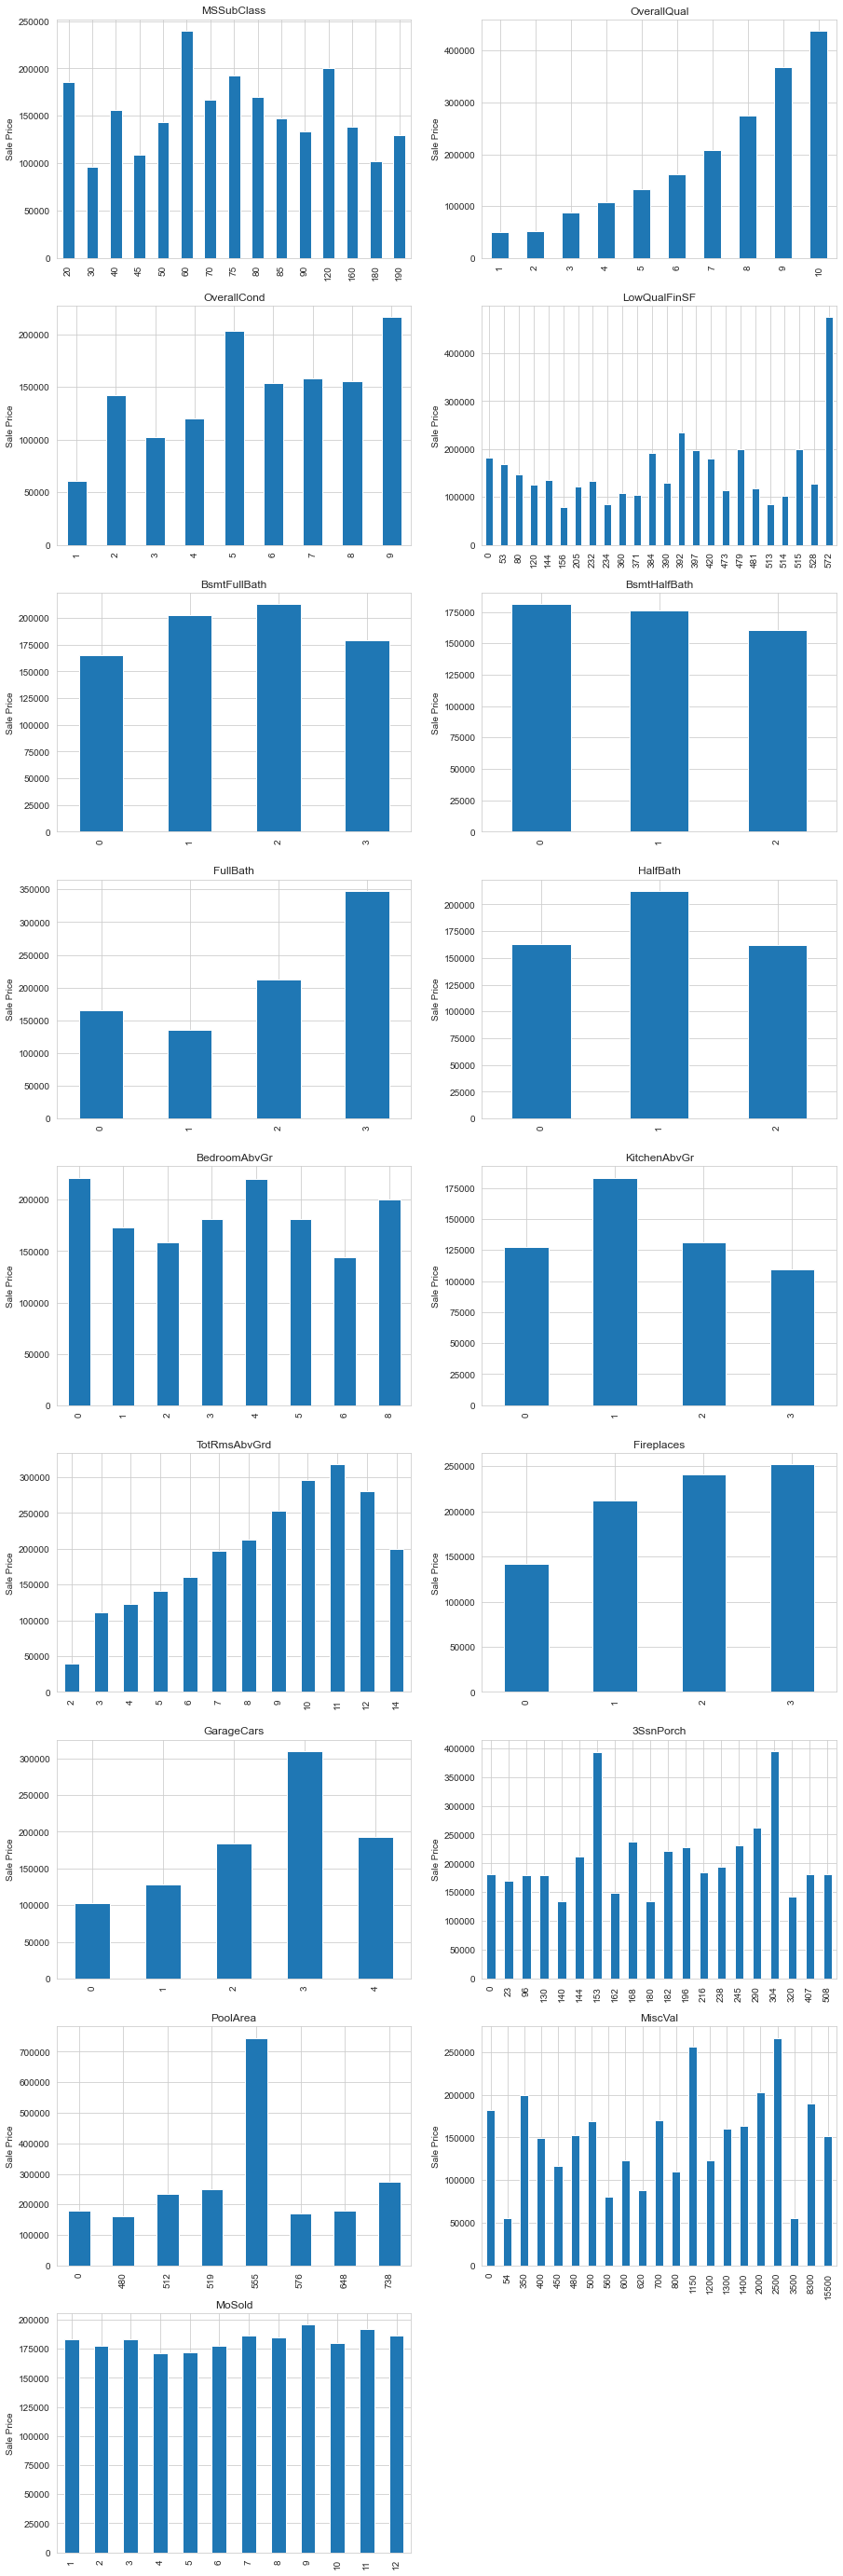

In [12]:
# ploting graph of discrete feature with the sales price
plt.figure(figsize = (15,50))
for feature in discrete_features:
    data = df.copy()
    index = discrete_features.index(feature) +1
    
    plt.subplot(9,2,index)
    data.groupby(feature)["SalePrice"].mean().plot.bar()
    plt.title(feature, fontsize = 12)
    plt.ylabel("Sale Price")
    plt.xlabel("")
    

#### There is some relation between them and the sales price.

### 2. Continous Variables

In [13]:
# getting continous features
continous_features = [feature for feature in numerical_features if feature not in discrete_features + year_features]
print("Total continous feature are ", len(continous_features))

df[continous_features].head()

Total continous feature are  16


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


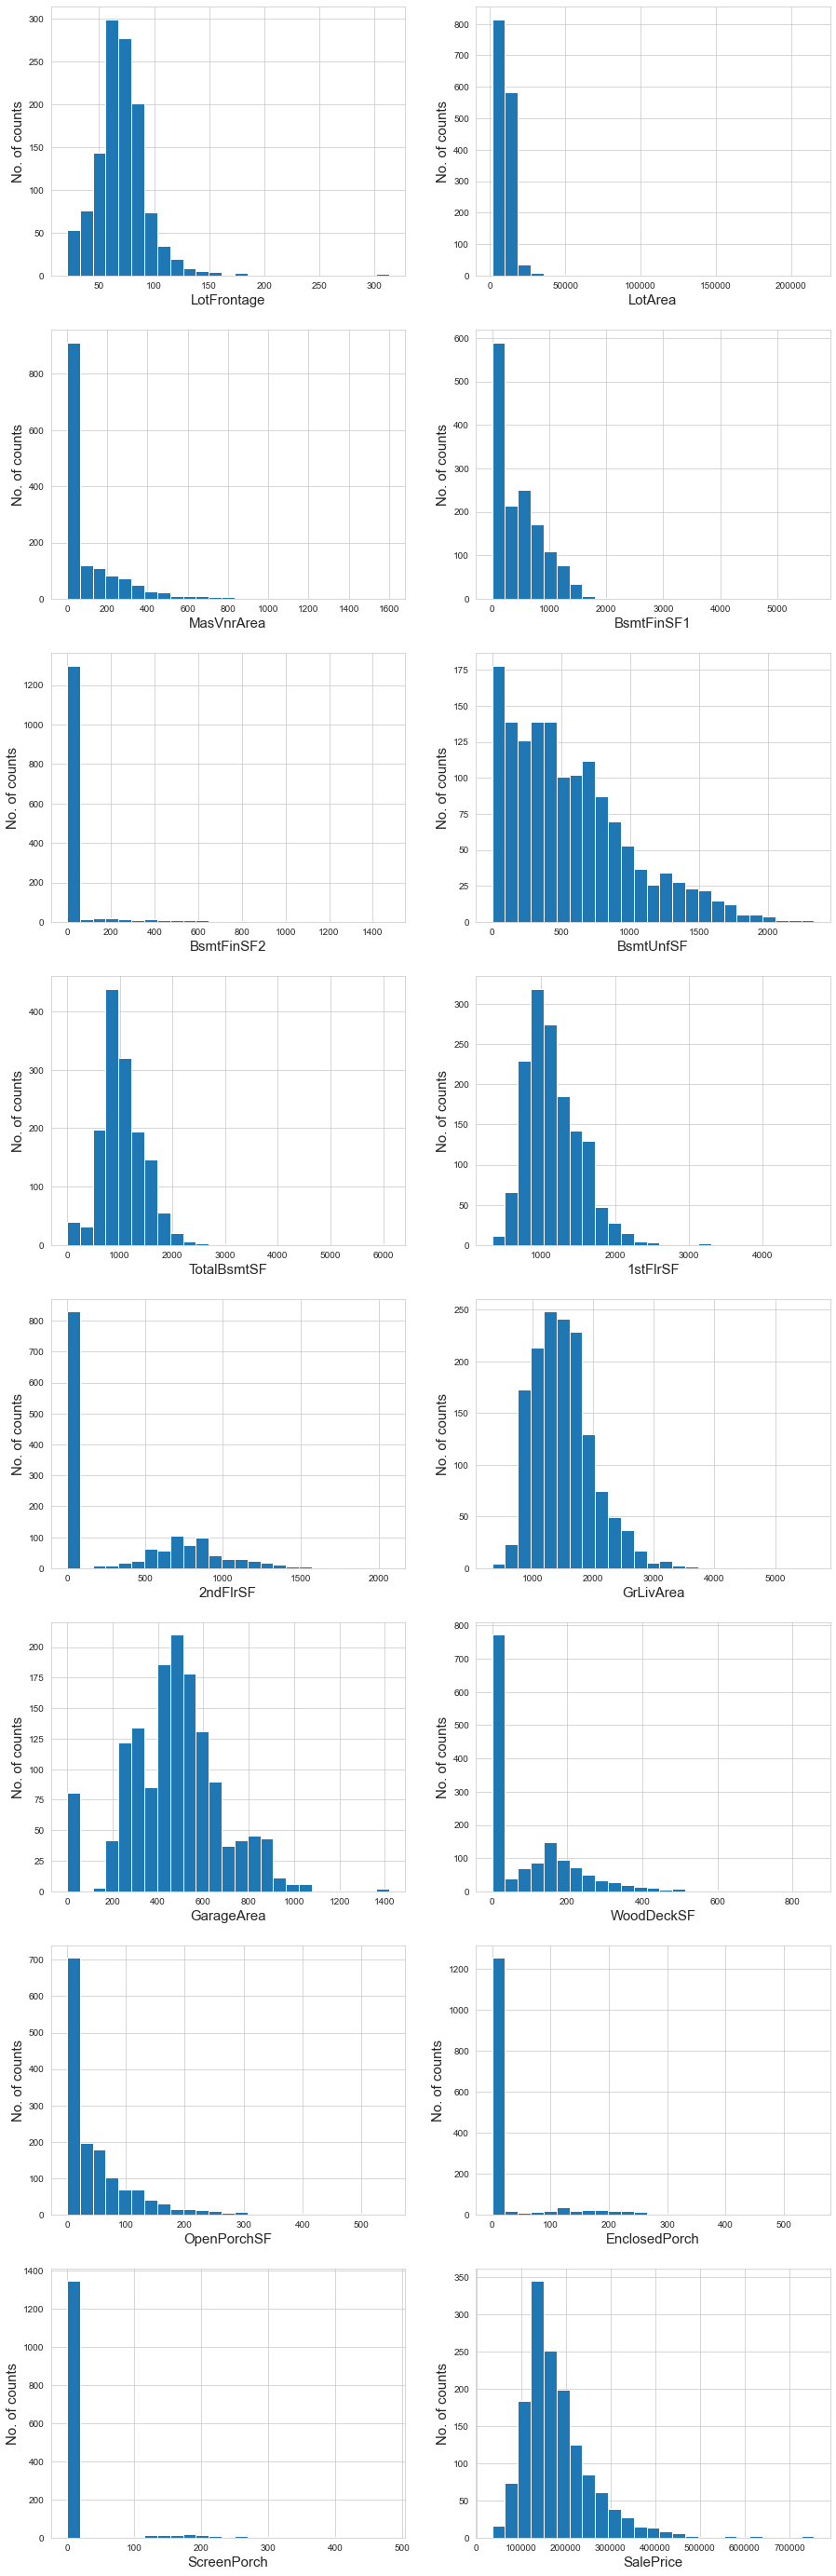

In [14]:
# analyzing continous feature variables using histograms
plt.figure(figsize = (15,50))

for feature in continous_features:
    index = continous_features.index(feature) +1
    
    plt.subplot(8,2,index)
    df[feature].hist(bins = 25)
    plt.xlabel(feature, fontsize = 15)
    plt.ylabel("No. of counts", fontsize = 15)


#### By this, LotFrontage, 1stFlrSF, FrLIvArea, SalePrice are normally distributed and the rest of them are not normally distributed or skewed data.

#### For the not normally distributed or skewed data we are using logarithmic method. In which we take log or the value and make relationship with the target variable

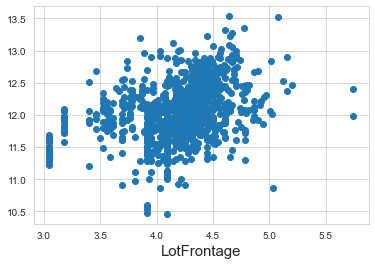

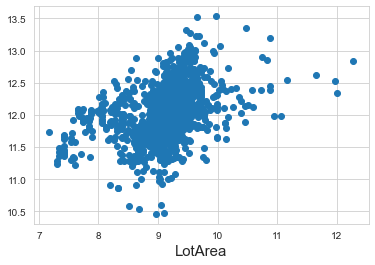

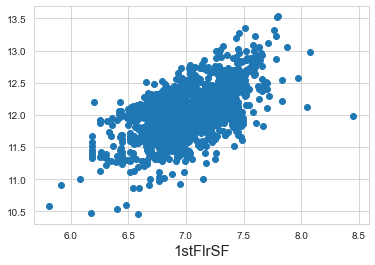

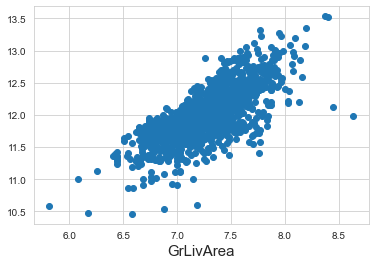

In [15]:
# logarithmic method 

for feature in continous_features:
    data = df.copy()
    if 0 not in data[feature].unique() and feature != "SalePrice":
        data[feature] = np.log(data[feature])
        data["SalePrice"] = np.log(data["SalePrice"])
        plt.scatter(data[feature], data["SalePrice"])
        plt.xlabel(feature, fontsize = 15)
        plt.show()

### Outliers

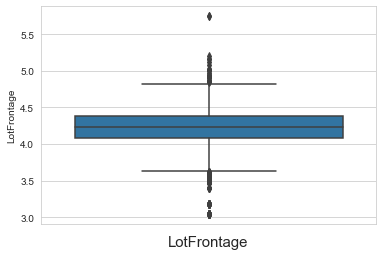

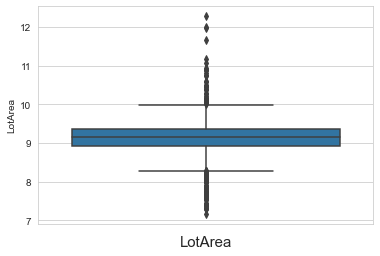

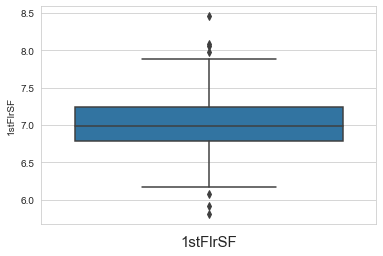

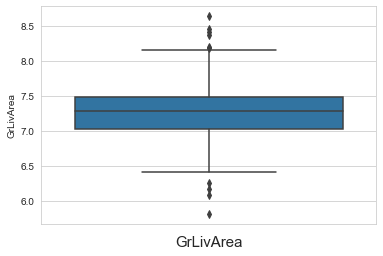

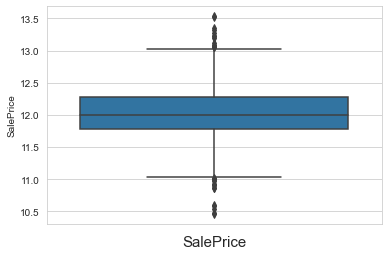

In [16]:
# for ouliers we use boxplot
for feature in continous_features:
    if 0 not in df[feature].unique():
        sns.boxplot(y = np.log(df[feature]))
        plt.xlabel(feature, fontsize = 15)
        plt.show()

#### There are so much outliers in the features.

### Categorical Features

In [17]:
# getting categorical features
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]
print(f"Total categorical features are {len(categorical_features)}")
df[categorical_features].head()

Total categorical features are 43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [18]:
# for number of categories in each categorical feature
for feature in categorical_features:
    print(f"{feature} has number of categories = {df[feature].nunique()}")

MSZoning has number of categories = 5
Street has number of categories = 2
Alley has number of categories = 2
LotShape has number of categories = 4
LandContour has number of categories = 4
Utilities has number of categories = 2
LotConfig has number of categories = 5
LandSlope has number of categories = 3
Neighborhood has number of categories = 25
Condition1 has number of categories = 9
Condition2 has number of categories = 8
BldgType has number of categories = 5
HouseStyle has number of categories = 8
RoofStyle has number of categories = 6
RoofMatl has number of categories = 8
Exterior1st has number of categories = 15
Exterior2nd has number of categories = 16
MasVnrType has number of categories = 4
ExterQual has number of categories = 4
ExterCond has number of categories = 5
Foundation has number of categories = 6
BsmtQual has number of categories = 4
BsmtCond has number of categories = 4
BsmtExposure has number of categories = 4
BsmtFinType1 has number of categories = 6
BsmtFinType2 ha

#### Most of the features have 3-10 categories in it but some of them have more than 10 categories (i.e Neighborhood, Exterior1st, Exterior2nd)

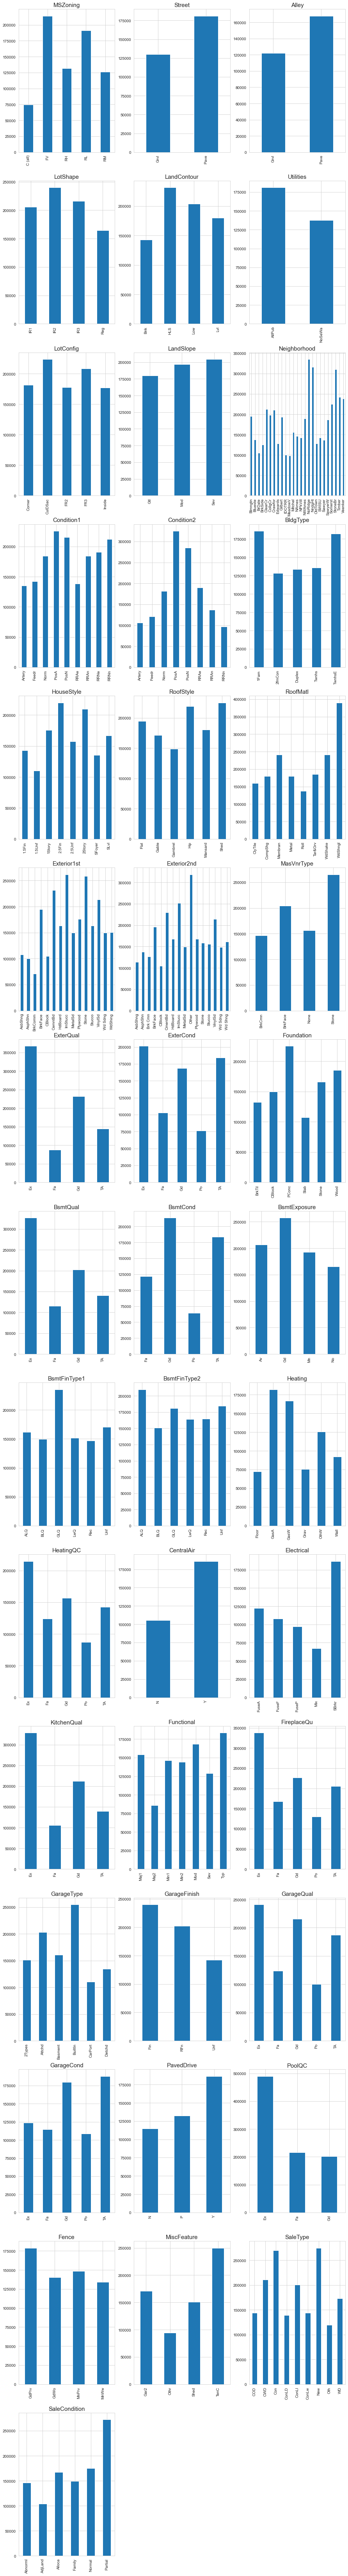

In [19]:
# relation between categorical feature and sales price
plt.figure(figsize = (15,120))
for feature in categorical_features:
    data = df.copy()
    
    index = categorical_features.index(feature) +1
    plt.subplot(15,3,index)
    data.groupby(feature)["SalePrice"].mean().plot.bar()
    plt.xlabel("")
    plt.title(feature, fontsize = 15)

<img src = "data/seperator.png">

<h2 align = center> Feature Engineering </h2>

### Missing Values

#### Categorical Missing categories

In [20]:
# missing values in categorical features
categorical_with_na = [feature for feature in df.columns if df[feature].dtype =='O' and df[feature].isnull().sum() > 1 ]
for feature in categorical_with_na:
    print(f"{feature} : {np.round(df[feature].isnull().mean(), 4)}% missing value ")
print("Total categorical feature with missing values =", len(categorical_with_na))

Alley : 0.9377% missing value 
MasVnrType : 0.0055% missing value 
BsmtQual : 0.0253% missing value 
BsmtCond : 0.0253% missing value 
BsmtExposure : 0.026% missing value 
BsmtFinType1 : 0.0253% missing value 
BsmtFinType2 : 0.026% missing value 
FireplaceQu : 0.4726% missing value 
GarageType : 0.0555% missing value 
GarageFinish : 0.0555% missing value 
GarageQual : 0.0555% missing value 
GarageCond : 0.0555% missing value 
PoolQC : 0.9952% missing value 
Fence : 0.8075% missing value 
MiscFeature : 0.963% missing value 
Total categorical feature with missing values = 15


In [21]:
# replacing the categorical missing values with missing category
for feature in categorical_features:
    df[feature].fillna("Missing", inplace = True)
df[categorical_with_na].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

#### Numerical Missing values

In [22]:
# missing values for numerical variables
numerical_with_na = [feature for feature in numerical_features if df[feature].isnull().sum() >1 ]
for feature in numerical_with_na:
    print(f"{feature} : {np.round(df[feature].isnull().mean(), 3)}% missing value")

LotFrontage : 0.177% missing value
MasVnrArea : 0.005% missing value
GarageYrBlt : 0.055% missing value


In [23]:
# replacing the numerical nan values with their median of the feature because there is so many outliers in that
# and we also add a new feature which tells about that the how much nan values the numerical feature have
# for the new feature name = feature name + "nan" and will have 1 or 0 , (1 for missing value, 0 for other value)
for feature in numerical_with_na:
    median_value = df[feature].median()
    
    # adding the new feature
    df[feature + "nan"] = np.where(df[feature].isnull(),1,0)
    
    # putting median into nan value
    df[feature].fillna(median_value, inplace = True)

df[numerical_with_na].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [24]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


#### Temporal Variables

In [25]:
# Temporal variable
# getting the relation between how much the house was old with respect to the sales price
# subtract the year data from year sold so it converted into numbers

for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt',]:
    df[feature] = df["YrSold"] - df[feature]

df[year_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008


### Skewed continous numerical feature

In [26]:
# getting the feature which has skewed data
skewed_num_features = [feature for feature in continous_features if 0 not in df[feature].unique()]
skewed_num_features

['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

In [27]:
# for skewed data features we use logarithim method 
for feature in skewed_num_features:
    df[feature] = np.log(df[feature])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


### Handling Rare categories
There are some categories in categorical features which are rare or only 1% and doesn't have any significance on target varible

In [28]:
# replacing rare categories with rare category
for feature in categorical_features:
    
    # calculating the % count of each category
    temp = data.groupby(feature)["SalePrice"].count()/len(data)
    
    # the category name which is less thatn 1%
    temp_df = temp[temp < 0.01].index
    
    # replacing it with rare
    df[feature] = np.where(df[feature].isin(temp_df), "Rare_cat", df[feature])

### Labeling the Categories
In this, categories in categorical features are converted in numerical labels 

In [29]:
for feature in categorical_features:
    cat_list = df[feature].unique() 
    
    # creating label for each category
    label_order = {k:i for i,k in enumerate(cat_list, 0)}
    
    # applying labels to feature 
    df[feature] = df[feature].map(label_order)

In [30]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,60,0,4.174387,9.041922,0,0,0,0,0,0,0,0,0,0,0,0,7,5,5,5,0,0,0,0,0,196.0,0,0,0,0,0,0,0,706,0,0,150,856,0,0,0,0,6.752270,854,0,7.444249,1,0,2,1,3,1,0,8,0,0,0,0,5.0,0,2,548,0,0,0,0,61,0,0,0,0,0,0,0,0,2,2008,0,0,12.247694,0,0,0
1,20,0,4.382027,9.169518,0,0,0,0,0,1,0,1,1,0,0,1,6,8,31,31,0,0,1,1,1,0.0,1,0,1,0,0,1,1,978,0,0,284,1262,0,0,0,0,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,0,1,1,0,31.0,0,2,460,0,0,0,298,0,0,0,0,0,0,0,0,0,5,2007,0,0,12.109011,0,0,0
2,60,0,4.219508,9.328123,0,0,1,0,0,0,0,0,0,0,0,0,7,5,7,6,0,0,0,0,0,162.0,0,0,0,0,0,2,0,486,0,0,434,920,0,0,0,0,6.824374,866,0,7.487734,1,0,2,1,3,1,0,6,0,1,1,0,7.0,0,2,608,0,0,0,0,42,0,0,0,0,0,0,0,0,9,2008,0,0,12.317167,0,0,0
3,70,0,4.094345,9.164296,0,0,1,0,0,2,0,2,0,0,0,0,7,5,91,36,0,0,2,2,1,0.0,1,0,2,1,1,0,1,216,0,0,540,756,0,1,0,0,6.867974,756,0,7.448334,1,0,1,0,3,1,0,7,0,1,2,1,8.0,1,3,642,0,0,0,0,35,272,0,0,0,0,0,0,0,2,2006,0,1,11.849398,0,0,0
4,60,0,4.430817,9.565214,0,0,1,0,0,1,0,3,0,0,0,0,8,5,8,8,0,0,0,0,0,350.0,0,0,0,0,0,3,0,655,0,0,490,1145,0,0,0,0,7.043160,1053,0,7.695303,1,0,2,1,4,1,0,9,0,1,1,0,8.0,0,3,836,0,0,0,192,84,0,0,0,0,0,0,0,0,12,2008,0,0,12.429216,0,0,0


<img src = "data/seperator.png" >

<h2 align = center> Feature Scaling </h2>

### Importing library

In [31]:
from sklearn.preprocessing import MinMaxScaler
# it usually scale the data in between 0 to 1

In [32]:
# getting the feature which has to be scaled
feature_scale = [feature for feature in df.columns if feature != "SalePrice"]

# fitting hthe model
scaler = MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler()

In [33]:
# transform the data into MinMazScaler 
scaler.transform(df[feature_scale])

array([[0.23529412, 0.        , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.        , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.        , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

#### It will give arrays of feature value array, so convert it into data frame .

In [34]:
# concating the scaler model with the sales price data
model_df = pd.concat([pd.DataFrame(scaler.transform(df[feature_scale]), columns = feature_scale), df["SalePrice"]], axis = 1)
model_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan,SalePrice
0,0.235294,0.0,0.418208,0.366344,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,0.0,0.0,0.00,0.12250,0.000000,0.0,0.00,0.00,0.00,0.00,0.000000,0.125089,0.0,0.0,0.064212,0.140098,0.0,0.00,0.0,0.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.000000,0.500000,0.0,0.000000,0.0,0.0,0.046729,0.000000,0.50,0.386460,0.0,0.0,0.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,0.0,0.00,0.0,0.0,0.0,12.247694
1,0.000000,0.0,0.495064,0.391317,0.0,0.0,0.000000,0.0,0.0,0.25,0.0,0.045455,0.2,0.0,0.0,0.2,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.1,0.1,0.25,0.00000,0.333333,0.0,0.25,0.00,0.00,0.25,0.166667,0.173281,0.0,0.0,0.121575,0.206547,0.0,0.00,0.0,0.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.0,0.333333,0.2,0.0,0.289720,0.000000,0.50,0.324401,0.0,0.0,0.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.25,0.0,0.00,0.0,0.0,0.0,12.109011
2,0.235294,0.0,0.434909,0.422359,0.0,0.0,0.333333,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,0.0,0.0,0.00,0.10125,0.000000,0.0,0.00,0.00,0.00,0.50,0.000000,0.086109,0.0,0.0,0.185788,0.150573,0.0,0.00,0.0,0.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.000000,0.333333,0.0,0.333333,0.2,0.0,0.065421,0.000000,0.50,0.428773,0.0,0.0,0.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.727273,0.50,0.0,0.00,0.0,0.0,0.0,12.317167
3,0.294118,0.0,0.388581,0.390295,0.0,0.0,0.333333,0.0,0.0,0.50,0.0,0.090909,0.0,0.0,0.0,0.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.2,0.25,0.00000,0.333333,0.0,0.50,0.25,0.25,0.00,0.166667,0.038271,0.0,0.0,0.231164,0.123732,0.0,0.25,0.0,0.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.000000,0.416667,0.0,0.333333,0.4,0.2,0.074766,0.333333,0.75,0.452750,0.0,0.0,0.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.00,0.0,0.25,0.0,0.0,0.0,11.849398
4,0.235294,0.0,0.513123,0.468761,0.0,0.0,0.333333,0.0,0.0,0.25,0.0,0.136364,0.0,0.0,0.0,0.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,0.0,0.0,0.00,0.21875,0.000000,0.0,0.00,0.00,0.00,0.75,0.000000,0.116052,0.0,0.0,0.209760,0.187398,0.0,0.00,0.0,0.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.000000,0.583333,0.0,0.333333,0.2,0.0,0.074766,0.000000,0.75,0.589563,0.0,0.0,0.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.50,0.0,0.00,0.0,0.0,0.0,12.429216


### Now our training dataset is ready to build the model.

<img src = "data/seperator.png" >

<h2 align = center > Model Building & Testing </h2>

In [35]:
# library for splittin the dataset
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(model_df.drop("SalePrice", axis = 1), model_df["SalePrice"],
                                                    test_size= 0.3, random_state= 0)

## Multiple Linear Regression Method

In [37]:
# importing library
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

In [38]:
# fitting the model
regr.fit(x_train, y_train)

LinearRegression()

In [39]:
regr.coef_

array([-1.96434669e-03, -6.06127703e-03,  1.15203385e-01,  3.48840506e-01,
       -2.42771573e-01,  3.00752722e-02,  3.40303791e-02,  4.92804150e-02,
       -1.86414244e-01,  2.40385921e-02,  1.14842019e-02, -4.54216705e-02,
       -8.05313249e-02, -2.02314809e-01,  1.33207557e-02,  5.68799586e-03,
        6.26293261e-01,  3.81631376e-01, -2.79151655e-01, -6.42299122e-02,
        7.22217226e-03, -2.05040695e-02, -1.73396215e-02,  4.25971172e-03,
        1.95036219e-02,  9.15378719e-03, -1.30412388e-02, -5.17849585e-02,
       -4.38979697e-02,  6.99855298e-02, -2.63074991e-02,  1.36237668e-02,
       -6.18822863e-03, -2.05614063e+12, -1.67162520e-02, -5.36986407e+11,
       -8.51017807e+11,  2.22590702e+12, -2.22265494e-03, -6.22957818e-02,
       -4.93307495e-02, -8.18345453e-03,  3.70497247e-01,  1.57242615e-01,
        3.90620565e-02,  7.31459379e-01,  7.85892803e-02,  7.81748143e-03,
        1.18131012e-01,  4.84200083e-02, -1.48560405e-01, -2.52775859e-01,
        6.54728690e-02,  

In [40]:
regr.intercept_

10.641936182042146

In [41]:
regr.score(x_test, y_test)

0.8424955983981489

### By Multiple Linear regression we get accuracy about 84%.

## Ridge Rigression

In [42]:
# importing the library
from sklearn.linear_model import Ridge

In [43]:
# taking the value of alpha
alpha_value = 0.001

In [44]:
# fitting the model
ridg_regr = Ridge(alpha = alpha_value)
ridg_regr.fit(x_train, y_train)

Ridge(alpha=0.001)

In [45]:
ridg_regr.coef_

array([-1.99946975e-03, -1.30103050e-02,  1.27047265e-01,  3.45613068e-01,
       -2.15985627e-01,  3.80689444e-02,  2.58180542e-02,  3.80915694e-02,
       -2.28216248e-01,  2.23151105e-02,  1.42080101e-02, -4.27163763e-02,
       -8.66950916e-02, -2.49537601e-01,  1.44648084e-02,  1.79316068e-02,
        6.05356773e-01,  3.74772579e-01, -2.96966341e-01, -5.28924435e-02,
        7.33056233e-03, -1.32532871e-02, -2.18395022e-02,  1.36769206e-02,
        2.41339684e-02,  2.29807635e-02, -2.13854062e-02, -5.57879963e-02,
       -3.71553673e-02,  7.80564661e-02, -1.90409750e-02,  4.74252326e-03,
       -1.33762121e-02,  3.76687078e-01, -7.99437888e-04,  6.35208435e-02,
        1.92886191e-02,  3.70656269e-01,  1.97386610e-02, -8.27645419e-02,
       -5.12272284e-02,  1.63547394e-02,  3.83723301e-01,  1.52925231e-01,
        5.69739073e-02,  7.51189511e-01,  1.00620864e-01,  2.11362100e-02,
        1.22620766e-01,  5.52492006e-02, -1.10202573e-01, -2.63099195e-01,
        6.45943046e-02,  

In [46]:
ridg_regr.intercept_

10.626602144084883

In [47]:
ridg_regr.score(x_train, y_train)

0.9106351346791091

### From Ridge Regression the accuracy was 91%.

## Lasso Regression

In [48]:
#importint the library
from sklearn.linear_model import Lasso

In [49]:
# taking the value of alpha
alpha_value = 0.001

In [50]:
# fitting the model
las_regr = Lasso(alpha =alpha_value )
las_regr.fit(x_train,y_train)

Lasso(alpha=0.001)

In [51]:
las_regr.coef_

array([-0.0137605 , -0.        ,  0.02444765,  0.24312918, -0.        ,
        0.        ,  0.04304632,  0.00746023, -0.        ,  0.01263461,
        0.        , -0.02063068, -0.08085963, -0.05667565, -0.03522128,
       -0.        ,  0.7371846 ,  0.28534726, -0.22969531, -0.07013199,
        0.01866988,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.00741447, -0.07106532,  0.0157757 ,
       -0.01328377,  0.        , -0.01247791,  0.22171145,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.08031498,
       -0.06135656, -0.        ,  0.37629591,  0.03224487,  0.        ,
        0.85136411,  0.12061427,  0.        ,  0.07909576,  0.04472612,
       -0.        , -0.        ,  0.03769799,  0.        , -0.09214641,
        0.09544899,  0.02898539, -0.02986851, -0.        ,  0.        ,
        0.14856018,  0.10103752, -0.        , -0.        , -0.01865358,
        0.08081161,  0.        ,  0.        ,  0.        ,  0.02

In [52]:
las_regr.intercept_

10.64434498073191

In [53]:
las_regr.score(x_test,y_test)

0.8593046559235045

### From Lasso Regression the accuracy of is 85%

<img src = "data/seperator.png">